***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="white")

# Change default pandas display options
pd.options.display.float_format = '{:,.2f}'.format

<div class="alert alert-block alert-info">
<b>Load the Data, add total profit and see info about data</b>
</div>

In [2]:
df = pd.read_excel('Sales.xlsx')

df.insert(17, 'Profit Margin', df['Retail Price'] - df['Cost Price'], True) 
df.insert(18, 'Total Profit', df['Profit Margin'] * df['Order Quantity'], True) 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           1039 non-null   object        
 1   Order Date         1039 non-null   datetime64[ns]
 2   Customer Name      1039 non-null   object        
 3   Address            1039 non-null   object        
 4   City               1039 non-null   object        
 5   State              1039 non-null   object        
 6   Customer Type      1039 non-null   object        
 7   Account Manager    1039 non-null   object        
 8   Order Priority     1037 non-null   object        
 9   Product Name       1039 non-null   object        
 10  Product Category   1039 non-null   object        
 11  Product Container  1039 non-null   object        
 12  Ship Mode          1039 non-null   object        
 13  Ship Date          1037 non-null   datetime64[ns]
 14  Cost Pri

<div class="alert alert-block alert-info">
<b>Correlation matrix</b>
</div>

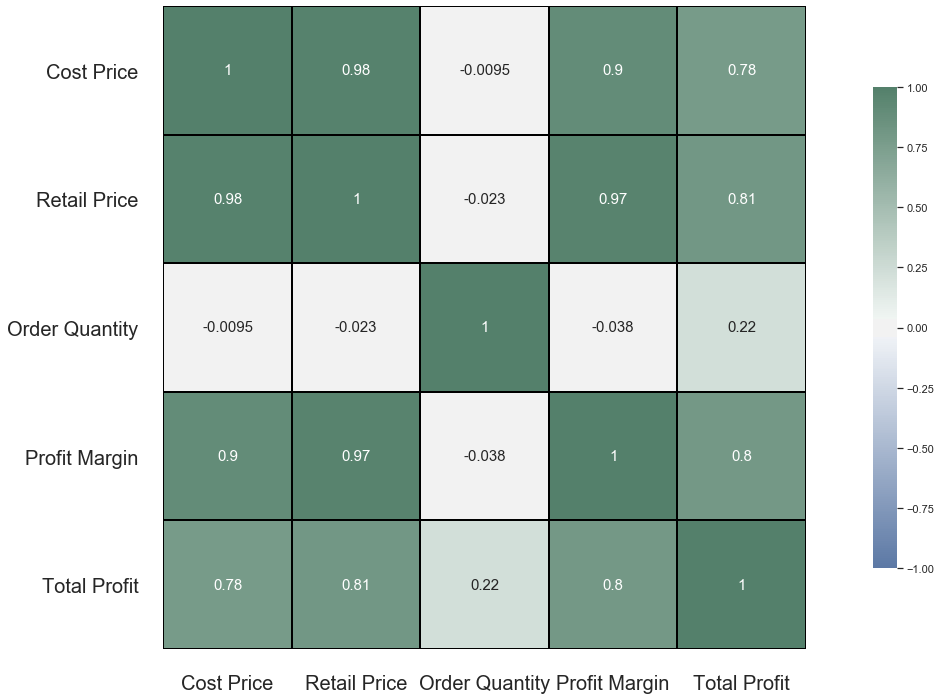

In [3]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

Custom_cmap = sns.diverging_palette(250, 150, 50, as_cmap = True)

ax = sns.heatmap(df.corr(), annot = True, cmap = Custom_cmap, vmax= 1, center = 0, vmin= -1,
            square = True, linewidths = 1, linecolor = 'black', cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Filtered BoxPlot of profit margin by city</b>
</div>

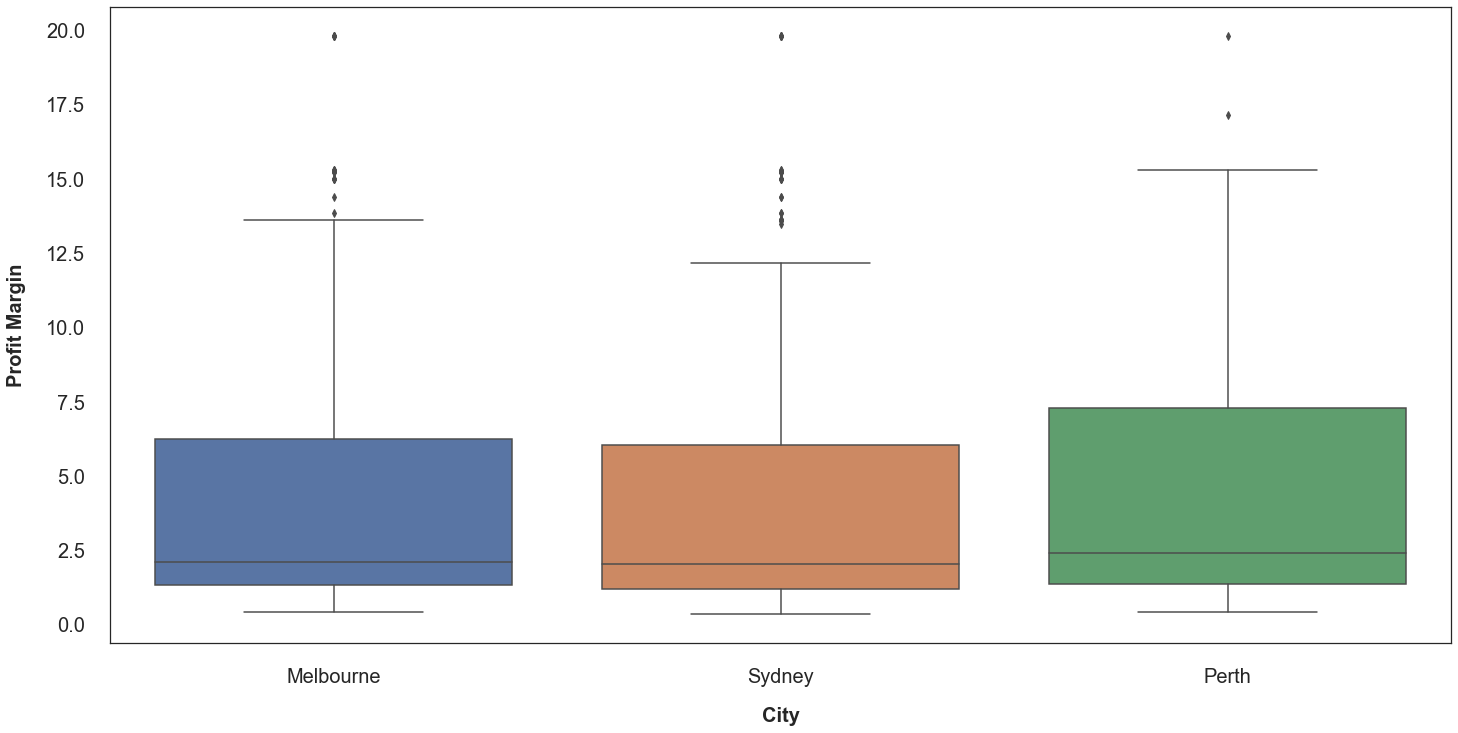

In [4]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

fil = df['Profit Margin'] <= 20
ax = sns.boxplot(x = df['City'], y = df['Profit Margin'][fil], data = df)
ax.set_xlabel('City', weight = 'bold', fontsize = 20, labelpad = 20)
ax.set_ylabel('Profit Margin', weight = 'bold', fontsize = 20, labelpad = 20)
ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Pivot table sorted by date</b>
</div>

In [5]:
pivot_all = pd.pivot_table(df, index = ['Order Date', 'Account Manager', 'Product Name', 'Customer Type'], 
                               values = ['Profit Margin', 'Order Quantity', 'Total Profit'], 
                               aggfunc = np.sum, fill_value = 0)

pivot_all = pivot_all.sort_values(by = ['Order Date'], ascending = False)

pivot_all.head()

Order Quantity  \
Order Date Account Manager Product Name                  Customer Type                    
2017-02-07 Connor Betts    Binder Clips by OIC           Consumer                    10   
                           Beekin 105-Key Black Keyboard Home Office                 31   
2017-02-05 Stevie Bacata   Artisan Legal 4-Ring Binder   Home Office                  2   
2017-02-04 Natasha Song    Artisan Legal 4-Ring Binder   Small Business              41   
2017-02-03 Connor Betts    Artisan 479 Labels            Home Office                 38   

                                                                         Profit Margin  \
Order Date Account Manager Product Name                  Customer Type                   
2017-02-07 Connor Betts    Binder Clips by OIC           Consumer                 0.55   
                           Beekin 105-Key Black Keyboard Home Office             13.59   
2017-02-05 Stevie Bacata   Artisan Legal 4-Ring Binder   Home Office              7.34   
2017-02-04 Natasha Song    Artisan Legal 4-Ring Binder   Small Business           7.34   
2017-02-03 Connor Betts    Artisan 479 Labels            Home Office              1.02   

                                                                         Total Profit  
Order Date Account Manager Product Name                  Customer Type                 
2017-02-07 Connor Betts    Binder Clips by OIC           Consumer                5.50  
                           Beekin 105-Key Black Keyboard Home Office           421.29  
2017-02-05 Stevie Bacata   Artisan Legal 4-Ring Binder   Home Office            14.68  
2017-02-04 Natasha Song    Artisan Legal 4-Ring Binder   Small Business        300.94  
2017-02-03 Connor Betts    Artisan 479 Labels            Home Office            38.76

<div class="alert alert-block alert-info">
<b>Pivot table sorted by total profit</b>
</div>

In [6]:
pivot_manager = pd.pivot_table(df, index = ['Account Manager'],
                                   values = ['Profit Margin', 'Order Quantity', 'Total Profit'], 
                                   aggfunc = np.sum, fill_value = 0)

pivot_manager = pivot_manager.sort_values(by = ['Total Profit'], ascending = False)

pivot_manager

,Order Quantity,Profit Margin,Total Profit
Account Manager,,,
Yvette Biti,3434,"2,729.85","74,078.75"
Tina Carlton,3574,"2,262.73","64,239.66"
Connor Betts,4302,"2,477.16","63,426.68"
Natasha Song,1864,"2,138.81","52,879.16"
Leighton Forrest,1399,"2,243.61","43,067.04"
Phoebe Gour,2340,"1,375.36","41,114.67"
Aanya Zhang,1788,"1,429.02","40,545.33"
Samantha Chairs,1848,"1,474.93","39,431.86"
Mihael Khan,2076,"1,436.05","38,208.48"
